In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
from datetime import datetime, timedelta
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('../data/neo_task.csv')
df

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,3561024.0,(2011 GZ2),0.016016,0.035813,56014.078517,1.024333e+06,26.10,False
1,54016766.0,(2020 HT6),0.030518,0.068240,7864.348060,3.268186e+07,24.70,False
2,3746620.0,(2016 ED156),0.055533,0.124177,55257.544508,6.538636e+07,23.40,False
3,3633054.0,(2013 FD8),0.019256,0.043057,41531.404722,1.260796e+07,25.70,False
4,3742124.0,(2016 CW31),0.139494,0.311918,67639.394481,7.130590e+07,21.40,False
...,...,...,...,...,...,...,...,...
90831,54231436.0,(2021 YE),0.017561,0.039268,23264.740825,1.635007e+06,25.90,False
90832,3824972.0,(2018 KL),0.110804,0.247765,24802.519406,3.351901e+07,21.90,False
90833,3740101.0,(2016 AB166),0.035039,0.078350,116288.999548,5.471396e+07,24.40,False
90834,3691093.0,(2014 SQ260),0.044112,0.098637,45763.317060,2.694877e+07,23.90,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90266 non-null  float64
 1   name                90790 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90379 non-null  float64
 4   relative_velocity   90279 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   absolute_magnitude  90152 non-null  float64
 7   hazardous           90836 non-null  bool   
dtypes: bool(1), float64(6), object(1)
memory usage: 4.9+ MB


In [5]:
df = df.drop(['id'], axis = 1)

Столбец 'id' удалим, так как он никак не характеризует объекты, не заполнен полностью, но при этом всё равно может оказать влияние на итоговый результат

In [6]:
df.columns

Index(['name', 'est_diameter_min', 'est_diameter_max', 'relative_velocity',
       'miss_distance', 'absolute_magnitude', 'hazardous'],
      dtype='object')

Столбцы можно не переименовывать, названия у столбцов приемлимы

## Обработка пропущенных значений

In [7]:
df.isna().sum()

name                   46
est_diameter_min        0
est_diameter_max      457
relative_velocity     557
miss_distance           0
absolute_magnitude    684
hazardous               0
dtype: int64

В столбеце 'name' заменин неизвестные значения unknown'ами

In [8]:
df['name'] = df['name'].fillna('Unknown')

В остальные столбцы с неизвестными добавим медиану, так как всего данно более 90 000 строк, а значит знаечние одно и то же, встречающееся в 700 строках не критично 

In [9]:
df['est_diameter_max'] = df['est_diameter_max'].fillna(df['est_diameter_max'].median())
df['relative_velocity'] = df['relative_velocity'].fillna(df['relative_velocity'].median())
df['absolute_magnitude'] = df['absolute_magnitude'].fillna(df['absolute_magnitude'].median())

In [10]:
df.isna().sum()

name                  0
est_diameter_min      0
est_diameter_max      0
relative_velocity     0
miss_distance         0
absolute_magnitude    0
hazardous             0
dtype: int64

In [11]:
df['hazardous'].value_counts()

hazardous
False    81996
True      8840
Name: count, dtype: int64

## Коррекция типов данных

Я хочу исправить тип данных столбца 'hazardous', заменив True и False на 1 и 0 соответсвенно.

In [12]:
df['hazardous'] = df['hazardous'].astype(int)

In [13]:
df['hazardous'].unique()

array([0, 1])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                90836 non-null  object 
 1   est_diameter_min    90836 non-null  float64
 2   est_diameter_max    90836 non-null  float64
 3   relative_velocity   90836 non-null  float64
 4   miss_distance       90836 non-null  float64
 5   absolute_magnitude  90836 non-null  float64
 6   hazardous           90836 non-null  int32  
dtypes: float64(5), int32(1), object(1)
memory usage: 4.5+ MB


In [15]:
df

,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,(2011 GZ2),0.016016,0.035813,56014.078517,1.024333e+06,26.10,0
1,(2020 HT6),0.030518,0.068240,7864.348060,3.268186e+07,24.70,0
2,(2016 ED156),0.055533,0.124177,55257.544508,6.538636e+07,23.40,0
3,(2013 FD8),0.019256,0.043057,41531.404722,1.260796e+07,25.70,0
4,(2016 CW31),0.139494,0.311918,67639.394481,7.130590e+07,21.40,0
...,...,...,...,...,...,...,...
90831,(2021 YE),0.017561,0.039268,23264.740825,1.635007e+06,25.90,0
90832,(2018 KL),0.110804,0.247765,24802.519406,3.351901e+07,21.90,0
90833,(2016 AB166),0.035039,0.078350,116288.999548,5.471396e+07,24.40,0
90834,(2014 SQ260),0.044112,0.098637,45763.317060,2.694877e+07,23.90,0


##  Исследование основных параметров(проверка на выбросы)

In [16]:
df.describe()[['est_diameter_min', 'est_diameter_max', 'relative_velocity', 'miss_distance', 'absolute_magnitude']]

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
count,90836.000000,90836.000000,90836.000000,9.083600e+04,90836.000000
mean,0.127432,0.284022,48042.236980,3.706655e+07,23.527958
std,0.298511,0.666582,25218.666659,2.235204e+07,2.883104
min,0.000609,0.001362,203.346433,6.745533e+03,9.230000
25%,0.019256,0.043057,28714.148508,1.721082e+07,21.380000
50%,0.048368,0.108153,44190.108201,3.784658e+07,23.700000
75%,0.143402,0.316257,62804.910500,5.654900e+07,25.700000
max,37.892650,84.730541,236990.128088,7.479865e+07,33.200000


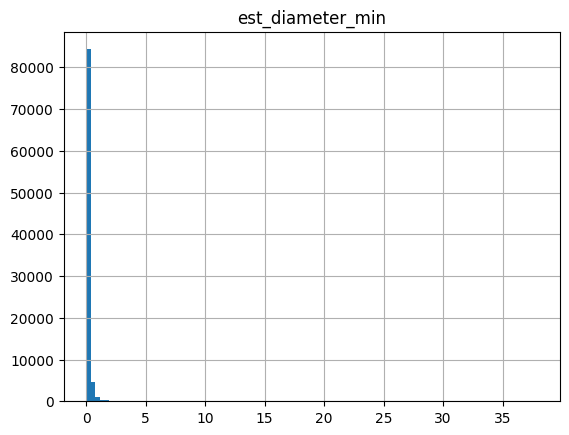

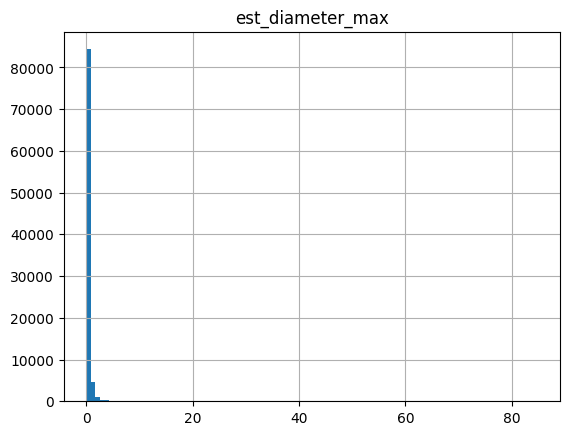

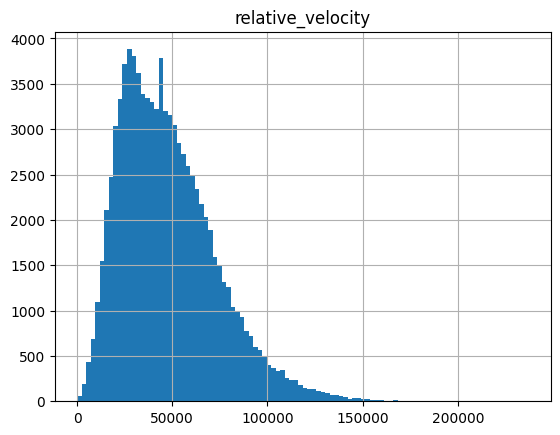

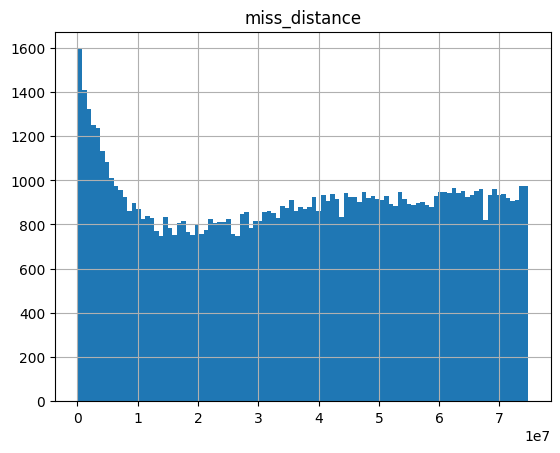

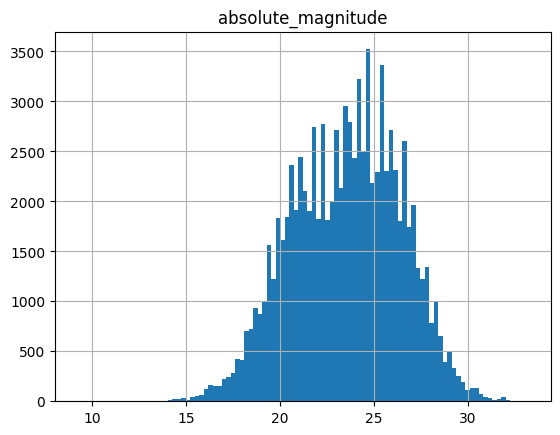

In [17]:
columns = ['est_diameter_min', 'est_diameter_max', 'relative_velocity', 'miss_distance', 'absolute_magnitude']

for column in columns:
    df.hist(column, bins = 100)

Почистим от выбросов столбцы 'est_diameter_min', 'est_diameter_max' и 'relative_velocity'

In [18]:
outlier = df[["est_diameter_min","est_diameter_max", "relative_velocity"]]
outlier

,est_diameter_min,est_diameter_max,relative_velocity
0,0.016016,0.035813,56014.078517
1,0.030518,0.068240,7864.348060
2,0.055533,0.124177,55257.544508
3,0.019256,0.043057,41531.404722
4,0.139494,0.311918,67639.394481
...,...,...,...
90831,0.017561,0.039268,23264.740825
90832,0.110804,0.247765,24802.519406
90833,0.035039,0.078350,116288.999548
90834,0.044112,0.098637,45763.317060


In [19]:
Q1 = outlier.quantile(0.25)
Q1

est_diameter_min         0.019256
est_diameter_max         0.043057
relative_velocity    28714.148508
Name: 0.25, dtype: float64

In [20]:
Q3 = outlier.quantile(0.75)
Q3

est_diameter_min         0.143402
est_diameter_max         0.316257
relative_velocity    62804.910500
Name: 0.75, dtype: float64

In [21]:
# IQR-оценки
IQR = Q3-Q1
# Отфильтрованные данные, из которых удалены выбросы
data_filtered = outlier[~((outlier < (Q1 - 1.5 * IQR)) |(outlier > (Q3 + 1.5 * IQR))).any(axis=1)]
data_filtered

,est_diameter_min,est_diameter_max,relative_velocity
0,0.016016,0.035813,56014.078517
1,0.030518,0.068240,7864.348060
2,0.055533,0.124177,55257.544508
3,0.019256,0.043057,41531.404722
4,0.139494,0.311918,67639.394481
...,...,...,...
90830,0.008405,0.018795,8424.366481
90831,0.017561,0.039268,23264.740825
90832,0.110804,0.247765,24802.519406
90834,0.044112,0.098637,45763.317060


In [22]:
data_filtered.describe()[["est_diameter_min","est_diameter_max", "relative_velocity"]]

,est_diameter_min,est_diameter_max,relative_velocity
count,81570.000000,81570.000000,81570.000000
mean,0.071778,0.160219,45108.792180
std,0.074778,0.166778,22156.048349
min,0.000609,0.001362,203.346433
25%,0.017561,0.039268,27701.160918
50%,0.040230,0.089958,42231.256197
75%,0.101054,0.225964,59513.924131
max,0.324007,0.724503,113930.799284


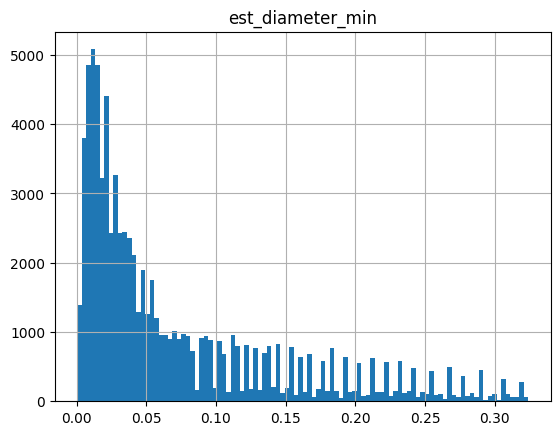

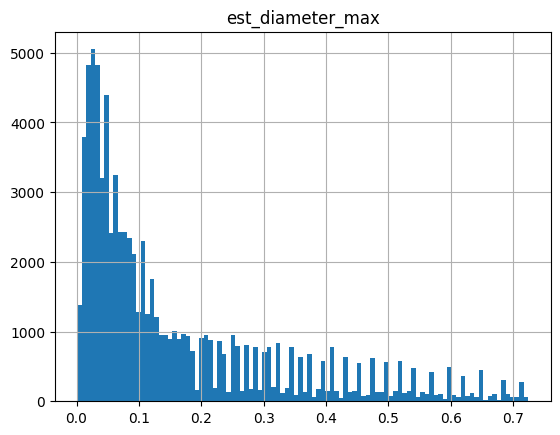

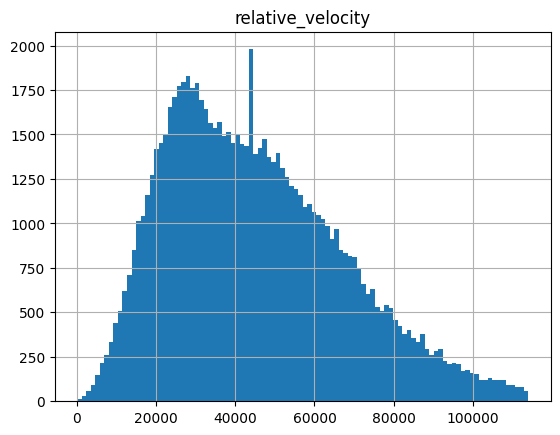

In [23]:
# создать гистограмму с отфильтрованным выбросом
filtered_outlier = data_filtered[["est_diameter_min","est_diameter_max", "relative_velocity"]]

for col in filtered_outlier:
    data_filtered.hist(col, bins=100)

In [24]:
index_list = list(data_filtered.index.values)

In [25]:
df = df[df.index.isin(index_list)]
df

,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,(2011 GZ2),0.016016,0.035813,56014.078517,1.024333e+06,26.10,0
1,(2020 HT6),0.030518,0.068240,7864.348060,3.268186e+07,24.70,0
2,(2016 ED156),0.055533,0.124177,55257.544508,6.538636e+07,23.40,0
3,(2013 FD8),0.019256,0.043057,41531.404722,1.260796e+07,25.70,0
4,(2016 CW31),0.139494,0.311918,67639.394481,7.130590e+07,21.40,0
...,...,...,...,...,...,...,...
90830,(2019 GF1),0.008405,0.018795,8424.366481,3.821292e+06,27.50,0
90831,(2021 YE),0.017561,0.039268,23264.740825,1.635007e+06,25.90,0
90832,(2018 KL),0.110804,0.247765,24802.519406,3.351901e+07,21.90,0
90834,(2014 SQ260),0.044112,0.098637,45763.317060,2.694877e+07,23.90,0


## Выделение целевого признака и предикторов

In [26]:
df['hazardous'].value_counts()

hazardous
0    75131
1     6439
Name: count, dtype: int64

In [27]:
y = df["hazardous"]
X = df.drop(["hazardous"], axis=1)

Придётся дропнуть столбец с названием объекта, так как для каждого объекта данные в данном столбеце уникалены, а значит OneHot кодирование бесполезно 

In [28]:
X = X.drop(["name"], axis=1)

In [29]:
y

0        0
1        0
2        0
3        0
4        0
        ..
90830    0
90831    0
90832    0
90834    0
90835    0
Name: hazardous, Length: 81570, dtype: int32

In [30]:
X

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
0,0.016016,0.035813,56014.078517,1.024333e+06,26.10
1,0.030518,0.068240,7864.348060,3.268186e+07,24.70
2,0.055533,0.124177,55257.544508,6.538636e+07,23.40
3,0.019256,0.043057,41531.404722,1.260796e+07,25.70
4,0.139494,0.311918,67639.394481,7.130590e+07,21.40
...,...,...,...,...,...
90830,0.008405,0.018795,8424.366481,3.821292e+06,27.50
90831,0.017561,0.039268,23264.740825,1.635007e+06,25.90
90832,0.110804,0.247765,24802.519406,3.351901e+07,21.90
90834,0.044112,0.098637,45763.317060,2.694877e+07,23.90


In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y)

In [32]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((65256, 5), (65256,), (16314, 5), (16314,))

## Балансировка

In [33]:
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)

In [34]:
X_train.shape,  y_train.shape

((120210, 5), (120210,))

## Масштабирование

In [35]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Логистическая регрессия

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg_pred = log_reg.predict(X_test)

print(classification_report(y_test, log_reg_pred))

              precision    recall  f1-score   support

           0       1.00      0.81      0.90     15026
           1       0.31      0.96      0.46      1288

    accuracy                           0.82     16314
   macro avg       0.65      0.89      0.68     16314
weighted avg       0.94      0.82      0.86     16314



In [37]:
cm = confusion_matrix(y_test, log_reg_pred)

print(cm)

[[12219  2807]
 [   51  1237]]


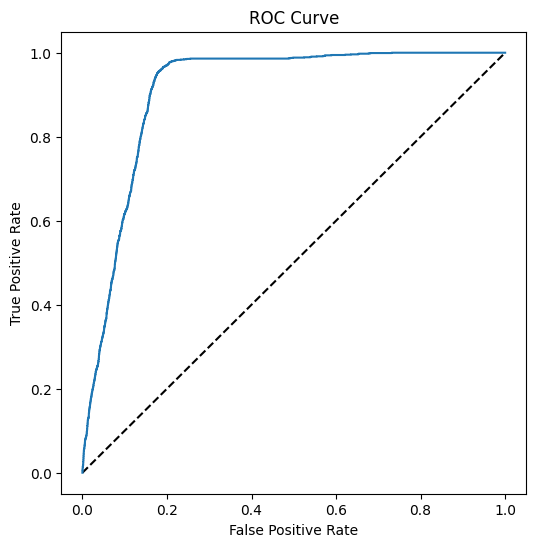

In [38]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

y_scores = log_reg.predict_proba(X_test)
# Вычислить ROC кривую
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# Построить ROC кривую
fig = plt.figure(figsize=(6, 6))
# Постройте диагональную линию 50%
plt.plot([0, 1], [0, 1], 'k--')
# Построить FPR and TPR, которые достигаются нашей моделью
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [39]:
auc = roc_auc_score(y_test,y_scores[:,1])
print(auc)

0.9112718596255105


# Наивный байесовский классификатор 

In [40]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB

naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(X_train, y_train)

GaussianNB()

In [41]:
naive_bayes_pred = naive_bayes_classifier.predict(X_test)

In [42]:
cm = confusion_matrix(y_test, naive_bayes_pred)

print(cm)

[[12548  2478]
 [  122  1166]]


In [43]:
print(classification_report(y_test, naive_bayes_pred))

              precision    recall  f1-score   support

           0       0.99      0.84      0.91     15026
           1       0.32      0.91      0.47      1288

    accuracy                           0.84     16314
   macro avg       0.66      0.87      0.69     16314
weighted avg       0.94      0.84      0.87     16314



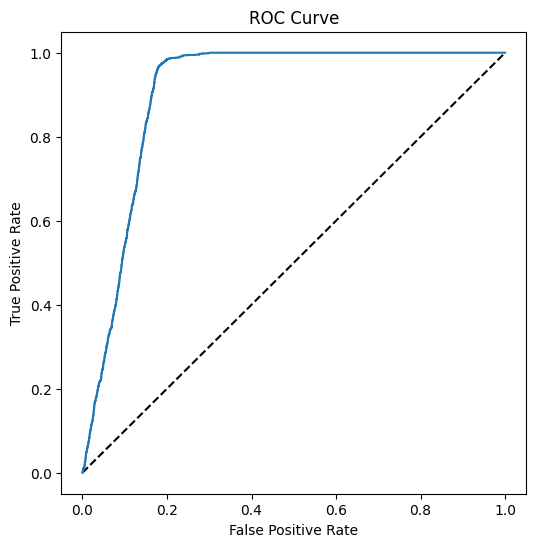

In [44]:
%matplotlib inline

y_scores = naive_bayes_classifier.predict_proba(X_test)
# Вычислить ROC кривую
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# Построить ROC кривую
fig2 = plt.figure(figsize=(6, 6))
# Постройте диагональную линию 50%
plt.plot([0, 1], [0, 1], 'k--')
# Построить FPR and TPR, которые достигаются нашей моделью
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [45]:
auc = roc_auc_score(y_test, y_scores[:,1])
print(auc)

0.9058798600024968


# SVM

In [46]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

svc = SVC(max_iter = 1000)

param_grid = {
    "C": np.arange(0.1, 1, 0.1),
    "kernel": ["linear", "poly", "rbf", "sigmoid"],
    "degree": [2, 3, 4],  
}

gridsearch = GridSearchCV(svc, param_grid)
gridsearch.fit(X_train, y_train)

best_c = gridsearch.best_params_['C']
best_kernel = gridsearch.best_params_['kernel']
best_degree = gridsearch.best_params_['degree']

gridsearch.best_params_

{'C': 0.1, 'degree': 2, 'kernel': 'linear'}

In [47]:
model_SVC = SVC(kernel=best_kernel, max_iter = 1000, C= best_c, degree = best_degree, probability=True)
model_SVC.fit(X_train, y_train)

SVC(C=0.1, degree=2, kernel='linear', max_iter=1000, probability=True)

In [48]:
SVC_pred = model_SVC.predict(X_test)

In [49]:
print(classification_report(y_test, SVC_pred))

              precision    recall  f1-score   support

           0       1.00      0.55      0.71     15026
           1       0.16      0.99      0.27      1288

    accuracy                           0.58     16314
   macro avg       0.58      0.77      0.49     16314
weighted avg       0.93      0.58      0.67     16314



In [50]:
cm = confusion_matrix(y_test, SVC_pred)

print(cm)

[[8209 6817]
 [  18 1270]]


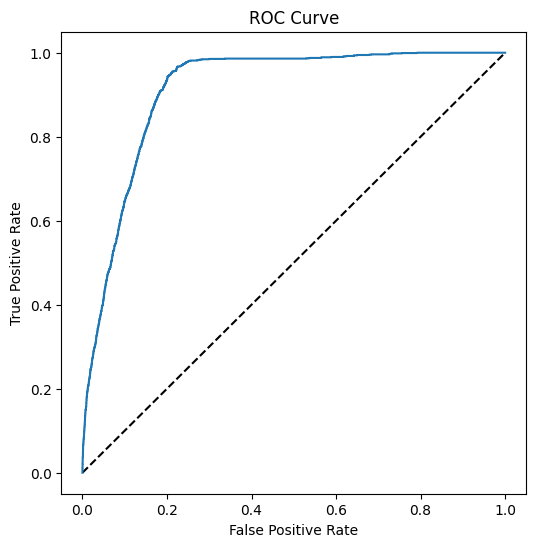

In [51]:
#%matplotlib inline

y_scores = model_SVC.predict_proba(X_test)
# Вычислить ROC кривую
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# Построить ROC кривую
fig3 = plt.figure(figsize=(6, 6))
# Постройте диагональную линию 50%
plt.plot([0, 1], [0, 1], 'k--')
# Построить FPR and TPR, которые достигаются нашей моделью
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [52]:
auc = roc_auc_score(y_test,y_scores[:,1])
print(auc)

0.912783318438516


## kNN

In [53]:
from sklearn.neighbors import KNeighborsClassifier

In [54]:
param_grid = {
    "n_neighbors": [3, 5, 7, 11, 13, 15, 20, 25, 35, 47, 50, 55, 75, 83, 90, 95, 100, 110, 115, 120, 125],
    "p": [1, 2],
}

In [55]:
gridseach = GridSearchCV(KNeighborsClassifier(weights="distance", metric="minkowski"), param_grid=param_grid, scoring="f1_micro")
gridseach.fit(X_train, y_train)

best_neighbors = gridseach.best_params_['n_neighbors']
best_p = gridseach.best_params_['p']
gridseach.best_params_

{'n_neighbors': 11, 'p': 1}

In [56]:
knn = KNeighborsClassifier(n_neighbors=best_neighbors, metric='minkowski', p=best_p, weights="distance")
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.99      0.87      0.92     15026
           1       0.36      0.88      0.51      1288

    accuracy                           0.87     16314
   macro avg       0.67      0.87      0.72     16314
weighted avg       0.94      0.87      0.89     16314



In [57]:
cm = confusion_matrix(y_test, knn_pred)
print(cm)

[[13005  2021]
 [  157  1131]]


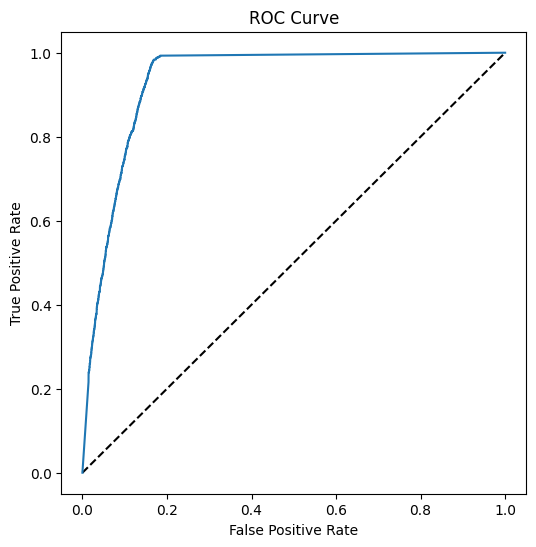

In [58]:
%matplotlib inline

y_scores = knn.predict_proba(X_test)
# Вычислить ROC кривую
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# Построить ROC кривую
fig = plt.figure(figsize=(6, 6))
# Постройте диагональную линию 50%
plt.plot([0, 1], [0, 1], 'k--')
# Построить FPR and TPR, которые достигаются нашей моделью
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [59]:
auc = roc_auc_score(y_test,y_scores[:,1])
print(auc)

0.9344556133757388


# Вычисление основных метрик

# Построение итоговой модели классификаторов

In [60]:
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,classification_report, precision_recall_curve

In [61]:
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes' : GaussianNB(),
    'SVC': SVC(kernel=best_kernel, max_iter = 5000, C= best_c, degree = best_degree, probability=True),
    'KNN classifier': KNeighborsClassifier(n_neighbors=best_neighbors, metric='minkowski', p=best_p, weights="distance")
}

In [62]:
n_classifiers = len(classifiers)

for index, (name, classifier) in enumerate(classifiers.items()):
    classifier.fit(X_train, np.ravel(y_train))
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy (train) for %s: %0.1f%% " % (name, accuracy * 100))
    print(classification_report(y_test,y_pred), '\n\n')

Accuracy (train) for Logistic Regression: 82.5% 
              precision    recall  f1-score   support

           0       1.00      0.81      0.90     15026
           1       0.31      0.96      0.46      1288

    accuracy                           0.82     16314
   macro avg       0.65      0.89      0.68     16314
weighted avg       0.94      0.82      0.86     16314
 


Accuracy (train) for Naive Bayes: 84.1% 
              precision    recall  f1-score   support

           0       0.99      0.84      0.91     15026
           1       0.32      0.91      0.47      1288

    accuracy                           0.84     16314
   macro avg       0.66      0.87      0.69     16314
weighted avg       0.94      0.84      0.87     16314
 


Accuracy (train) for SVC: 81.1% 
              precision    recall  f1-score   support

           0       0.97      0.82      0.89     15026
           1       0.26      0.75      0.38      1288

    accuracy                           0.81     16314

# Заключение

Из представленного выше можно сдлеать вывод, что лучше всего себя проявила модель на основе kNN классификатора, так её метркии самые высокие в сравнении с метриками остальных классификаторов.

# Собственная реализация

In [63]:
import sys
sys.path.append("..")
from models.metrics2 import mAccuracy, mPrecision, mRecall, mF1Score, mConfusionMatrix

In [100]:
def met(name, y_test, y_pred):
    print(name)
    print('\nAccuracy: ', mAccuracy(np.ravel(y_test), np.ravel(y_pred)))
    prec0, prec1 = mPrecision(np.ravel(y_test), np.ravel(y_pred))
    print('\nPrecision для класса 0: ', prec0, '\nPrecision для класса 1: ', prec1)
    recall0, recall1 = mRecall(np.ravel(y_test), np.ravel(y_pred))
    print('\nRecall для класса 0: ', recall0, '\nRecall для класса 1: ', recall1)
    f1_0, f1_1 = mF1Score(np.ravel(y_test), np.ravel(y_pred))
    print('\nF1-score для класса 0: ', f1_0, '\nF1-score для класса 1: ', f1_1 )
    print()

In [101]:
met("Logistic Regression", y_test, log_reg_pred)

Logistic Regression

Accuracy:  0.8248130440112786

Precision для класса 0:  0.9958435207823961 
Precision для класса 1:  0.30588526211671613

Recall для класса 0:  0.8131904698522561 
Recall для класса 1:  0.9604037267080745

F1-score для класса 0:  0.8952960140679953 
F1-score для класса 1:  0.4639909977494374



In [102]:
met("Naive Bayes", y_test, naive_bayes_pred)

Naive Bayes

Accuracy:  0.8406276817457399

Precision для класса 0:  0.990370955011839 
Precision для класса 1:  0.3199780461031833

Recall для класса 0:  0.8350858511912684 
Recall для класса 1:  0.90527950310559

F1-score для класса 0:  0.9061236279607163 
F1-score для класса 1:  0.4728304947283049



In [103]:
met("SVC", y_test, SVC_pred)

SVC

Accuracy:  0.581034694127743

Precision для класса 0:  0.9978120821684697 
Precision для класса 1:  0.15704216643996538

Recall для класса 0:  0.5463197124983362 
Recall для класса 1:  0.9860248447204969

F1-score для класса 0:  0.7060594331914163 
F1-score для класса 1:  0.27093333333333336



In [104]:
met("kNN", y_test, knn_pred)

kNN

Accuracy:  0.8664950349393159

Precision для класса 0:  0.9880717216228536 
Precision для класса 1:  0.3588197969543147

Recall для класса 0:  0.8654998003460668 
Recall для класса 1:  0.8781055900621118

F1-score для класса 0:  0.9227330779054916 
F1-score для класса 1:  0.5094594594594594



In [69]:
import sys
sys.path.append("..")
from models.kNN import kNN

In [110]:
myknn = kNN(k=5)

In [111]:
myknn.fit(X_train[:10000], np.ravel(y_train[:10000]))

In [112]:
myknn_pred = myknn.predict(X_test[:2500])

In [113]:
cm = confusion_matrix( np.ravel(y_test.iloc[:2500]), myknn_pred)

print(cm)

[[2210   71]
 [ 166   53]]


In [114]:
print(classification_report(y_test.iloc[:2500], myknn_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      2281
           1       0.43      0.24      0.31       219

    accuracy                           0.91      2500
   macro avg       0.68      0.61      0.63      2500
weighted avg       0.89      0.91      0.89      2500



# Задание
Какова вероятность отправиться на прогулку если идёт дождь, при наличии следующих наблюдений?

In [118]:
data = [
        ('солнечно', True),
        ('снег', False),
        ('облачно', False),
        ('дождь', False),
        ('солнечно', True),
        ('снег', False),
        ('облачно', True),
        ('снег', False),
        ('солнечно', False),
        ('облачно', True),
        ('снег', True),
        ('солнечно', True),
        ('дождь', False),
        ('дождь', True),
        ('облачно', True),
]

In [120]:
data = pd.DataFrame(data, columns=['weather', 'probability'])
data

,weather,probability
0,солнечно,True
1,снег,False
2,облачно,False
3,дождь,False
4,солнечно,True
5,снег,False
6,облачно,True
7,снег,False
8,солнечно,False
9,облачно,True


Составим сводную таблицу, куда отберём только те случаи, когда погода дождливая

In [132]:
data = data.loc[data.loc[:,'weather'] == 'дождь']

Найдём число строк, где значение столбца 'probability' равно True и общее число строк

In [133]:
true_data = len(data[data['probability']==True])
all_data = len(data)

Разделим true_data на all_data и найдём вероятность прогулки в дождь

In [134]:
print("Вероятность прогулки в дождь равна ", (true_data/all_data))

Вероятность прогулки в дождь равна  0.3333333333333333
